## Linear Modelling & Ablation Studies

In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, r2_score, mean_squared_error, explained_variance_score

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
font = { 'family': 'DejaVu Sans', 'weight': 'bold', 'size': 16 }
plt.rc('font', **font)

### Feature names

In [3]:
with open('../data/feature_names.txt') as f:
    feature_names = [ line.strip() for line in f.readlines() ]

In [4]:
feature_names[:3]

['YEAR_2014', 'YEAR_2015', 'YEAR_2016']

### X and Y

In [5]:
X_train = np.load('../data/X_train.npy')

In [6]:
X_train.shape

(12648, 888)

In [7]:
X_test = np.load('../data/X_test.npy')

In [8]:
X_test.shape

(3163, 888)

In [9]:
y_train = np.load('../data/y_train.npy')

In [10]:
y_train.shape

(12648,)

In [11]:
y_test = np.load('../data/y_test.npy')

In [12]:
y_test.shape

(3163,)

### Modelling

In [13]:
model = LogisticRegression(random_state=42)

In [14]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
coefficients = model.coef_[0]

In [16]:
coefficients

array([ 3.76860542e-07,  4.52314183e-07,  5.74240434e-07,  6.12569905e-07,
        5.86354520e-07,  2.54465741e-06,  5.76821744e-08,  2.60251649e-06,
       -1.76907834e-10,  2.60233958e-06,  0.00000000e+00,  2.60251649e-06,
       -1.76907834e-10,  2.60233958e-06,  0.00000000e+00,  6.38258663e-07,
        5.27825651e-08,  1.88510767e-07,  7.23792455e-07,  3.86966631e-07,
        6.12028504e-07,  6.41639595e-08,  4.20261337e-08,  2.29274093e-07,
        1.18469505e-07,  6.38258663e-07,  5.27825651e-08,  4.60601083e-08,
        4.37015328e-08,  3.29838289e-09,  6.27613774e-09,  2.35558066e-09,
        1.22007500e-07,  2.44881000e-07,  3.43146373e-07,  1.27293389e-07,
        2.87000057e-08,  3.68619177e-08,  2.63397291e-08,  3.15884040e-07,
        3.10849524e-08,  6.37234990e-08,  1.51202528e-08,  6.30264357e-10,
        1.32611616e-08,  2.88577650e-08,  9.17607057e-08, -1.08322660e-10,
        4.03419076e-08,  1.54648373e-08,  1.97146664e-09,  1.19683072e-08,
        2.87562590e-08,  

In [17]:
model.intercept_

array([2.60233958e-06])

In [18]:
indices = np.argsort(coefficients)[::-1]

In [19]:
def print_top_features(features, coefficients, indices):
    print("Feature ranking:")
    for f in range(len(features))[:25]:
        print("%d. Feature %s [%d] (%f)" % (f + 1, features[indices[f]], indices[f], coefficients[indices[f]]))
    print('etc')

In [20]:
print_top_features(feature_names, coefficients, indices)

Feature ranking:
1. Feature SCH_ENROLMENTS [825] (0.001515)
2. Feature CAO_POINTS [827] (0.001021)
3. Feature DAYS_TO_FIRST_LOAN [841] (0.000127)
4. Feature LC_MATHS_POINTS [828] (0.000118)
5. Feature DAYS_TO_FIRST_LAB [842] (0.000096)
6. Feature DAYS_TO_SECOND_DUE_DATE [849] (0.000075)
7. Feature DAYS_TO_FIRST_DUE_DATE [844] (0.000073)
8. Feature EARLY_Q1_SUBS_PC [856] (0.000064)
9. Feature EARLY_Q2_SUBS_PC [857] (0.000061)
10. Feature FIRST_GRADE_PC [848] (0.000059)
11. Feature NUM_FEB_ACCESS_DAYS [870] (0.000054)
12. Feature EARLY_Q3_SUBS_PC [858] (0.000053)
13. Feature SECOND_GRADE_PC [853] (0.000052)
14. Feature AGE_AT_START [839] (0.000052)
15. Feature DAYS_TO_FIRST_CRM [886] (0.000041)
16. Feature NUM_EARLY_ACCESS_DAYS [861] (0.000038)
17. Feature DAYS_TO_FIRST_REG [824] (0.000038)
18. Feature EARLY_Q4_SUBS_PC [859] (0.000037)
19. Feature FIRST_GRADE [846] (0.000036)
20. Feature SECOND_GRADE [851] (0.000033)
21. Feature DAYS_TO_FIRST_ACCESS [843] (0.000029)
22. Feature NUM_SUBJE

In [21]:
def plot_top_features(feature_names, coefficients, indices, excluded=None):
    N = 10
    plt.figure(figsize=(16, 4))
    plt.title("Top-{} Feature coefficients".format(N))
    plt.bar(range(N), coefficients[indices][:N], color="b", align="center")
    plt.xticks(range(N), [ feature_names[index].replace('_', '\n') for index in indices[:N] ])
    plt.xlim([-1, N])
    if excluded:
        filename = '../figures/Ablation_Excluding_{}_Top_10_Feature_Importances.png'.format(excluded)
    else:
        filename = '../figures/modelling_Logistic_Regression_Top_10_Feature_Importances.png'
    plt.savefig(filename, bbox_inches="tight")

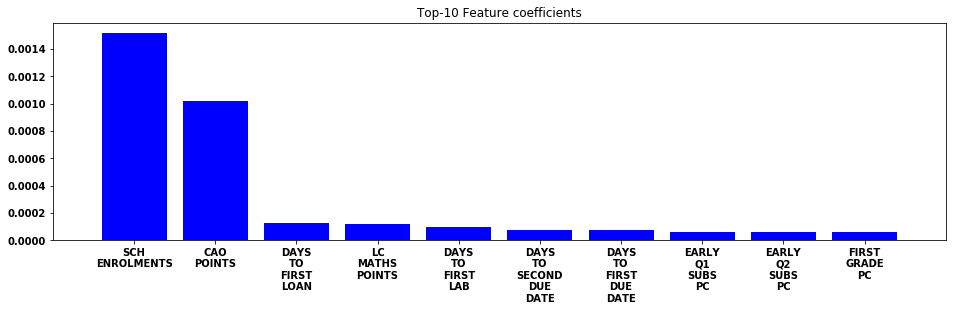

In [22]:
plot_top_features(feature_names, coefficients, indices)

In [23]:
model.score(X_test, y_test)

0.8804932026557066

In [24]:
y_pred = model.predict(X_test)

In [25]:
y_pred[:2]

array([ True,  True])

In [26]:
y_pred_int = [ int(i) for i in y_pred ]

In [27]:
y_pred_int[:2]

[1, 1]

In [28]:
y_test_int = [ int(i) for i in y_test ]

In [29]:
'{0:.5%} of the test set were predicted as True'.format(sum(y_pred_int) / float(len(y_pred_int)))

'99.96838% of the test set were predicted as True'

In [30]:
'{0:.5%} of the test set were actually True'.format(sum(y_test_int) / float(len(y_test_int)))

'88.08094% of the test set were actually True'

In [31]:
r2_score(y_test_int, y_pred_int)

-0.13833091185369817

In [32]:
mean_squared_error(y_test_int, y_pred_int)

0.1195067973442934

In [33]:
print(classification_report(y_test_int, y_pred_int))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00       377
          1       0.88      1.00      0.94      2786

avg / total       0.78      0.88      0.82      3163



### Ablation studies

In [34]:
original_columns = [
    # CATEGORIES
    'YEAR',
    'EARLY_TRANSFER',
    'EARLY_CANX_LEFT',
    'EARLY_CANX_DEFER',
    'FEB_CANX_LEFT',
    'FEB_CANX_DEFER',
    'FACULTY',
    'DEPT',
    'CODE',
    'COURSE',
    'CANX',
    'PREV_FACULTY',
    'PREV_DEPT',
    'PREV_CODE',
    'PREV_COURSE',
    'PREV_CANX',
    'PREV_RESULT',
    'FIRST_FACULTY',
    'FIRST_DEPT',
    'FIRST_CODE',
    'FIRST_COURSE',
    'FIRST_CANX',
    'NEXT_CODE',
    'NEXT_RESULT',
    'Y2_RETURN',
    'PASS_M1',
    'PASS_M5',
    'PASS_M8',
    'BIO_SEX',
    'ORIGIN_CODE',
    'SCH_ADDR_CODE',
    'SCH_DEIS',
    'SCH_FEE_PAYING',
    'STUDENT_TYPE',
    'STUDENT_ADDR_CODE',
    'ADDRESS_CODE',
    'PERMANENT_ADDR_CODE',
    'ENTERPRISE_ESOC',
    'ACC_FINANCE',
    'FIRST_REL_IND',
    'FIRST_QUARTILE_RANK',
    'SECOND_REL_IND',
    'SECOND_QUARTILE_RANK',
    'FIRST_RESULT',
    # NUMBERS
    'YR_NUM',
    'TOTAL_YEARS',
    'DAYS_TO_FIRST_REG',
    'SCH_ENROLMENTS',
    'YEARS_SINCE_LC',
    'CAO_POINTS',
    'LC_MATHS_POINTS',
    'NUM_GRANTS',
    'NUM_SUBJECTS',
    'NUM_MEMBERSHIPS',
    'NUM_SOCIETIES',
    'NUM_CLUBS',
    'NUM_M1_SUBJECTS',
    'NUM_M5_SUBJECTS',
    'NUM_M8_SUBJECTS',
    'NUM_M1_FAILS',
    'NUM_M5_FAILS',
    'AGE_AT_START',
    'NUM_EARLY_LOANS',
    'DAYS_TO_FIRST_LOAN',
    'DAYS_TO_FIRST_LAB',
    'DAYS_TO_FIRST_ACCESS',
    'DAYS_TO_FIRST_DUE_DATE',
    'DAYS_FIRST_SUBMITTED_EARLY',
    'FIRST_GRADE',
    'FIRST_ASSIGN_GRADE',
    'FIRST_GRADE_PC',
    'FIRST_GRADE',
    'DAYS_TO_SECOND_DUE_DATE',
    'DAYS_SECOND_SUBMITTED_EARLY',
    'SECOND_GRADE',
    'SECOND_ASSIGN_GRADE',
    'SECOND_GRADE_PC',
    'NUM_EARLY_ASSIGNMENTS',
    'NUM_EARLY_LATES',
    'EARLY_Q1_SUBS_PC',
    'EARLY_Q2_SUBS_PC',
    'EARLY_Q3_SUBS_PC',
    'EARLY_Q4_SUBS_PC',
    'NUM_EARLY_CRM',
    'NUM_EARLY_ACCESS_DAYS',
    'NUM_EARLY_TYPE_A',
    'NUM_EARLY_TYPE_B',
    'NUM_EARLY_TYPE_C',
    'NUM_EARLY_TYPE_D',
    'NUM_EARLY_TYPE_E',
    'NUM_EARLY_TYPE_S',
    'NUM_EARLY_TYPE_X',
    'NUM_FEB_CRM',
    'NUM_FEB_ACCESS_DAYS',
    'NUM_FEB_TYPE_A',
    'NUM_FEB_TYPE_B',
    'NUM_FEB_TYPE_C',
    'NUM_FEB_TYPE_D',
    'NUM_FEB_TYPE_E',
    'NUM_FEB_TYPE_S',
    'NUM_FEB_TYPE_X',
    'NUM_MAY_CRM',
    'NUM_MAY_TYPE_A',
    'NUM_MAY_TYPE_B',
    'NUM_MAY_TYPE_C',
    'NUM_MAY_TYPE_D',
    'NUM_MAY_TYPE_E',
    'NUM_MAY_TYPE_S',
    'NUM_MAY_TYPE_X',
    'DAYS_TO_FIRST_CRM',
    'PREV_NUM_CRM',
]

In [73]:
def train_model(cols_names_to_remove):
    
    # Columns to drop
    cols_to_drop = []
    for col in cols_names_to_remove:
        cols_to_drop.extend([ feature_name for feature_name in feature_names if feature_name.startswith(col) ])
    print('Excluding:', cols_to_drop)
    
    # Indexes to drop
    indexes_to_drop = [ feature_names.index(col) for col in cols_to_drop ]
    # Deep copy of the list
    features = feature_names[:] # or list(feature_names)
    for index in sorted(indexes_to_drop, reverse=True):
        del features[index]
    
    # New train and test sets
    X_mini_train = np.delete(X_train, indexes_to_drop, axis=1)
    X_mini_test = np.delete(X_test, indexes_to_drop, axis=1)
    
    # model
    model = LogisticRegression(random_state=42)
    # train
    model.fit(X_mini_train, y_train)
    
    # scores
    score = model.score(X_mini_test, y_test)
    
    # Predictions
    y_mini_pred = model.predict(X_mini_test)
    y_mini_pred_int = [ int(i) for i in y_mini_pred ]
    
    # Scorings
    r2 = r2_score(y_test_int, y_mini_pred_int)
    mse = mean_squared_error(y_test_int, y_mini_pred_int)
    var = explained_variance_score(y_test_int, y_mini_pred_int)
    
    # Get coefficients and indices
    coefficients = model.coef_[0]
    indices = np.argsort(coefficients)[::-1]
    
    # Print top features
    # print_top_features(features, coefficients, indices)
    
    # Plot top features
    # plot_top_features(features, coefficients, indices, excluded=column_name)
    
    print('Score: {:0.4f}\t R2: {:0.10f}\t MSE: {:0.10f}\t Variance: {:0.10f}'.format(score, r2, mse, var))
    
    return var

In [40]:
scores = {}

for column_name in original_columns:
    
    print('Leaving Column {} out'.format(column_name))
    
    # Train a model and give me back the variance explained
    var = train_model([ column_name ])
    
    # Leaving that column out, we get this variance explained
    scores[column_name] = var

    print()

Leaving Column YEAR out
['YEAR_2014', 'YEAR_2015', 'YEAR_2016', 'YEAR_2017', 'YEAR_2018', 'YEARS_SINCE_LC']
Score: 0.8805	 R2: -0.1383309119	 MSE: 0.1195067973	 Variance: -0.0037283804

Leaving Column EARLY_TRANSFER out
['EARLY_TRANSFER_N', 'EARLY_TRANSFER_Y']
Score: 0.8805	 R2: -0.1383309119	 MSE: 0.1195067973	 Variance: -0.0037283804

Leaving Column EARLY_CANX_LEFT out
['EARLY_CANX_LEFT_N', 'EARLY_CANX_LEFT_Y']
Score: 0.8805	 R2: -0.1383309119	 MSE: 0.1195067973	 Variance: -0.0037283804

Leaving Column EARLY_CANX_DEFER out
['EARLY_CANX_DEFER_N', 'EARLY_CANX_DEFER_Y']
Score: 0.8805	 R2: -0.1383309119	 MSE: 0.1195067973	 Variance: -0.0037283804

Leaving Column FEB_CANX_LEFT out
['FEB_CANX_LEFT_N', 'FEB_CANX_LEFT_Y']
Score: 0.8805	 R2: -0.1383309119	 MSE: 0.1195067973	 Variance: -0.0037283804

Leaving Column FEB_CANX_DEFER out
['FEB_CANX_DEFER_N', 'FEB_CANX_DEFER_Y']
Score: 0.8805	 R2: -0.1383309119	 MSE: 0.1195067973	 Variance: -0.0037283804

Leaving Column FACULTY out
['FACULTY_DCU BU

Score: 0.8805	 R2: -0.1383309119	 MSE: 0.1195067973	 Variance: -0.0037283804

Leaving Column PREV_CODE out
['PREV_CODE_AC', 'PREV_CODE_ACM', 'PREV_CODE_AF', 'PREV_CODE_ALIS', 'PREV_CODE_ALTS', 'PREV_CODE_AMPS', 'PREV_CODE_AP', 'PREV_CODE_AS', 'PREV_CODE_ATT', 'PREV_CODE_BAJG', 'PREV_CODE_BAJH', 'PREV_CODE_BAJI', 'PREV_CODE_BAJL', 'PREV_CODE_BAJM', 'PREV_CODE_BAJP', 'PREV_CODE_BAJW', 'PREV_CODE_BCL', 'PREV_CODE_BECE', 'PREV_CODE_BED', 'PREV_CODE_BHS', 'PREV_CODE_BMED', 'PREV_CODE_BNCG', 'PREV_CODE_BNGN', 'PREV_CODE_BNID', 'PREV_CODE_BNPY', 'PREV_CODE_BNS', 'PREV_CODE_BPY', 'PREV_CODE_BRE', 'PREV_CODE_BRH', 'PREV_CODE_BRM', 'PREV_CODE_BS', 'PREV_CODE_BT', 'PREV_CODE_CA', 'PREV_CODE_CAFM', 'PREV_CODE_CAM', 'PREV_CODE_CCS', 'PREV_CODE_CE', 'PREV_CODE_CES', 'PREV_CODE_CPSSD', 'PREV_CODE_CS', 'PREV_CODE_DME', 'PREV_CODE_EBF', 'PREV_CODE_EBG', 'PREV_CODE_EBS', 'PREV_CODE_EBT', 'PREV_CODE_EC', 'PREV_CODE_ECE', 'PREV_CODE_EE', 'PREV_CODE_ENGLIC', 'PREV_CODE_EPL', 'PREV_CODE_ESH', 'PREV_CODE_ET'

Score: 0.8805	 R2: -0.1383309119	 MSE: 0.1195067973	 Variance: -0.0037283804

Leaving Column FIRST_COURSE out
['FIRST_COURSE_B.Eng. Mechanical & Manufacturing Eng', 'FIRST_COURSE_B.Eng. in Biomedical Engineering', 'FIRST_COURSE_B.Eng. in Common Entry into Engineering', 'FIRST_COURSE_B.Eng. in Digital Media Engineering', 'FIRST_COURSE_B.Eng. in Mechatronic Engineering', 'FIRST_COURSE_BA Gaeilge agus Iriseoireacht', 'FIRST_COURSE_BA Gno agus Gaeilge', 'FIRST_COURSE_BA Languages for Int. Communication(Eng)', 'FIRST_COURSE_BA in Accounting and Finance', 'FIRST_COURSE_BA in Applied Language & Translation Stu', 'FIRST_COURSE_BA in Applied Language and Intercultural', 'FIRST_COURSE_BA in Communication Studies', 'FIRST_COURSE_BA in Contemporary Culture and Society', 'FIRST_COURSE_BA in Economics, Politics and Law', 'FIRST_COURSE_BA in Global Business (Canada)', 'FIRST_COURSE_BA in Global Business (France)', 'FIRST_COURSE_BA in Global Business (Germany)', 'FIRST_COURSE_BA in Global Business (Sp

Score: 0.8805	 R2: -0.1383309119	 MSE: 0.1195067973	 Variance: -0.0037283804

Leaving Column ADDRESS_CODE out
['ADDRESS_CODE_0.0', 'ADDRESS_CODE_1.0', 'ADDRESS_CODE_2.0', 'ADDRESS_CODE_3.0', 'ADDRESS_CODE_4.0', 'ADDRESS_CODE_5.0', 'ADDRESS_CODE_6.0', 'ADDRESS_CODE_7.0', 'ADDRESS_CODE_8.0', 'ADDRESS_CODE_9.0', 'ADDRESS_CODE_10.0', 'ADDRESS_CODE_11.0']
Score: 0.8805	 R2: -0.1383309119	 MSE: 0.1195067973	 Variance: -0.0037283804

Leaving Column PERMANENT_ADDR_CODE out
['PERMANENT_ADDR_CODE_0.0', 'PERMANENT_ADDR_CODE_1.0', 'PERMANENT_ADDR_CODE_2.0', 'PERMANENT_ADDR_CODE_3.0', 'PERMANENT_ADDR_CODE_4.0', 'PERMANENT_ADDR_CODE_5.0', 'PERMANENT_ADDR_CODE_6.0', 'PERMANENT_ADDR_CODE_7.0', 'PERMANENT_ADDR_CODE_8.0', 'PERMANENT_ADDR_CODE_9.0', 'PERMANENT_ADDR_CODE_10.0', 'PERMANENT_ADDR_CODE_11.0']
Score: 0.8805	 R2: -0.1383309119	 MSE: 0.1195067973	 Variance: -0.0037283804

Leaving Column ENTERPRISE_ESOC out
['ENTERPRISE_ESOC_0', 'ENTERPRISE_ESOC_1']
Score: 0.8805	 R2: -0.1383309119	 MSE: 0.119506

Score: 0.8805	 R2: -0.1383309119	 MSE: 0.1195067973	 Variance: -0.0037283804

Leaving Column NUM_EARLY_TYPE_S out
['NUM_EARLY_TYPE_S']
Score: 0.8805	 R2: -0.1383309119	 MSE: 0.1195067973	 Variance: -0.0037283804

Leaving Column NUM_EARLY_TYPE_X out
['NUM_EARLY_TYPE_X']
Score: 0.8805	 R2: -0.1383309119	 MSE: 0.1195067973	 Variance: -0.0037283804

Leaving Column NUM_FEB_CRM out
['NUM_FEB_CRM']
Score: 0.8805	 R2: -0.1383309119	 MSE: 0.1195067973	 Variance: -0.0037283804

Leaving Column NUM_FEB_ACCESS_DAYS out
['NUM_FEB_ACCESS_DAYS']
Score: 0.8805	 R2: -0.1383309119	 MSE: 0.1195067973	 Variance: -0.0037283804

Leaving Column NUM_FEB_TYPE_A out
['NUM_FEB_TYPE_A']
Score: 0.8805	 R2: -0.1383309119	 MSE: 0.1195067973	 Variance: -0.0037283804

Leaving Column NUM_FEB_TYPE_B out
['NUM_FEB_TYPE_B']
Score: 0.8805	 R2: -0.1383309119	 MSE: 0.1195067973	 Variance: -0.0037283804

Leaving Column NUM_FEB_TYPE_C out
['NUM_FEB_TYPE_C']
Score: 0.8805	 R2: -0.1383309119	 MSE: 0.1195067973	 Variance: -0.00372

In [42]:
def plot(scores):
    plt.figure(figsize=(16, 4))
    plt.title("Variance explained excluding the following features")
    plt.bar(range(len(scores)), scores.values(), color="b", align="center")
    plt.xticks(range(len(scores)), scores.keys(), rotation='vertical', fontsize=6)
    # Pad margins so that markers don't get clipped by the axes
    plt.margins(0.1)
    # Tweak spacing to prevent clipping of tick-labels
    plt.subplots_adjust(bottom=0.15)
    filename = '../figures/linear_model_variance_explained_by_excluding_features.png'
    plt.savefig(filename, bbox_inches="tight", dpi=100)

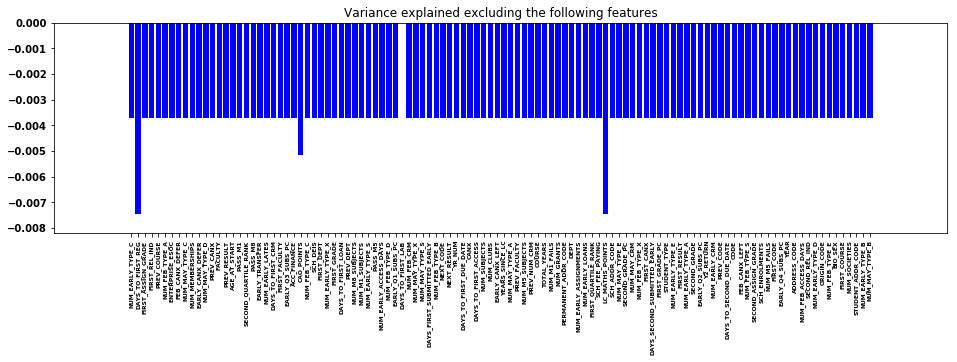

In [43]:
plot(scores)

In [37]:
for key, value in sorted(scores.items(), key=lambda kv: kv[1]):
    print('Excluding {},\t variance explained:{:0.5f}'.format(key, value))

Excluding DAYS_TO_FIRST_REG,	 variance explained:-0.00745
Excluding LC_MATHS_POINTS,	 variance explained:-0.00745
Excluding CAO_POINTS,	 variance explained:-0.00516
Excluding NUM_EARLY_TYPE_C,	 variance explained:-0.00373
Excluding FIRST_ASSIGN_GRADE,	 variance explained:-0.00373
Excluding FIRST_REL_IND,	 variance explained:-0.00373
Excluding PREV_COURSE,	 variance explained:-0.00373
Excluding NUM_FEB_TYPE_A,	 variance explained:-0.00373
Excluding ENTERPRISE_ESOC,	 variance explained:-0.00373
Excluding FEB_CANX_DEFER,	 variance explained:-0.00373
Excluding NUM_MAY_TYPE_C,	 variance explained:-0.00373
Excluding NUM_MEMBERSHIPS,	 variance explained:-0.00373
Excluding EARLY_CANX_DEFER,	 variance explained:-0.00373
Excluding NUM_MAY_TYPE_D,	 variance explained:-0.00373
Excluding PREV_CANX,	 variance explained:-0.00373
Excluding FACULTY,	 variance explained:-0.00373
Excluding PREV_RESULT,	 variance explained:-0.00373
Excluding AGE_AT_START,	 variance explained:-0.00373
Excluding PASS_M1,	 v

In [38]:
# create function to drop col
# CAlculate everything...?
# that we can re-use to drop multiple cols

In [65]:
column_names = [
    'DAYS_TO_FIRST_REG',
    'LC_MATHS_POINTS',
    'CAO_POINTS',
]

In [66]:
column_names

['DAYS_TO_FIRST_REG', 'LC_MATHS_POINTS', 'CAO_POINTS']

In [67]:
train_model(column_names)

['DAYS_TO_FIRST_REG', 'LC_MATHS_POINTS', 'CAO_POINTS']
Score: 0.8805	 R2: -0.1383309119	 MSE: 0.1195067973	 Variance: -0.0065770307


-0.006577030662977323

In [68]:
column_names = [
    'DAYS_TO_FIRST_REG',
    'LC_MATHS_POINTS',
]
train_model(column_names)

['DAYS_TO_FIRST_REG', 'LC_MATHS_POINTS']
Score: 0.8802	 R2: -0.1413423693	 MSE: 0.1198229529	 Variance: -0.0074548567


-0.0074548567010874756

In [69]:
column_names = [
    'LC_MATHS_POINTS',
    'CAO_POINTS',
]
train_model(column_names)

['LC_MATHS_POINTS', 'CAO_POINTS']
Score: 0.8805	 R2: -0.1383309119	 MSE: 0.1195067973	 Variance: -0.0065770307


-0.006577030662977323

In [70]:
column_names = [
    'DAYS_TO_FIRST_REG',
    'CAO_POINTS',
]
train_model(column_names)

['DAYS_TO_FIRST_REG', 'CAO_POINTS']
Score: 0.8802	 R2: -0.1413423693	 MSE: 0.1198229529	 Variance: -0.0088791818


-0.008879181812815329

In [71]:
column_names = [
    'DAYS_TO_FIRST_REG',
    'LC_MATHS_POINTS',
    'CAO_POINTS',
    'DAYS_TO_FIRST_LAB',
]
train_model(column_names)

['DAYS_TO_FIRST_REG', 'LC_MATHS_POINTS', 'CAO_POINTS', 'DAYS_TO_FIRST_LAB']
Score: 0.8808	 R2: -0.1353194544	 MSE: 0.1191906418	 Variance: 0.0000000000


0.0

In [72]:
column_names = [
    'DAYS_TO_FIRST_REG',
    'DAYS_TO_FIRST_LAB',
]
train_model(column_names)

['DAYS_TO_FIRST_REG', 'DAYS_TO_FIRST_LAB']
Score: 0.8808	 R2: -0.1353194544	 MSE: 0.1191906418	 Variance: 0.0000000000


0.0

In [74]:
column_names = [
    'CAO_POINTS',
    'DAYS_TO_FIRST_LAB',
]
train_model(column_names)

Excluding: ['CAO_POINTS', 'DAYS_TO_FIRST_LAB']
Score: 0.8808	 R2: -0.1353194544	 MSE: 0.1191906418	 Variance: 0.0000000000


0.0

In [75]:
column_names = []
train_model(column_names)

Excluding: []
Score: 0.8805	 R2: -0.1383309119	 MSE: 0.1195067973	 Variance: -0.0037283804


-0.003728380439522727